# Human Activity Recognition with Smartphones

Description of experiment:
    
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. 
Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. 
Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. 
The experiments have been video-recorded to label the data manually. 
The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).
The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, 
a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute information:

* For each record in the dataset the following is provided:

* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

* Triaxial Angular velocity from the gyroscope.

* A 561-feature vector with time and frequency domain variables.

* Its activity label.

* An identifier of the subject who carried out the experiment.

Dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones




In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")


In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Exploratory Data Analysis

In [4]:
print("Train shape: ", train.shape)


Train shape:  (7352, 563)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
print("Total Null values in Train: {}\n".format(train.isnull().values.sum()))


Total Null values in Train: 0



In [7]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


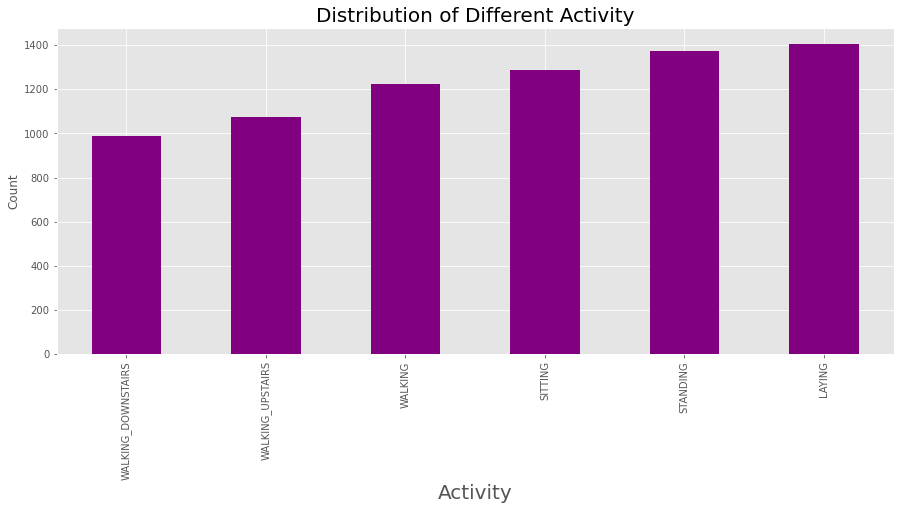

In [8]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

train['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'purple')
plt.title('Distribution of Different Activity', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [9]:
Activity = train['Activity'].value_counts().sort_values(ascending=False).head(15)
Activity = Activity.reset_index().rename(columns={'index':'Activity','Activity':'Total_No.'})
Activity

,Activity,Total_No.
0,LAYING,1407
1,STANDING,1374
2,SITTING,1286
3,WALKING,1226
4,WALKING_UPSTAIRS,1073
5,WALKING_DOWNSTAIRS,986


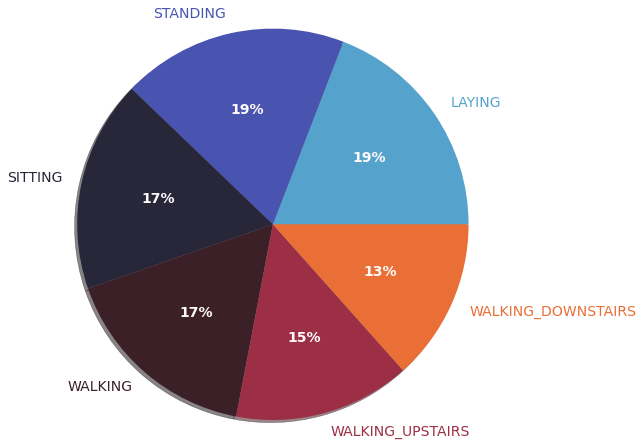

In [10]:
colors = sns.set_palette('icefire')
patches,text, pcts= plt.pie(x='Total_No.',labels='Activity',autopct='%1.0f%%',data=Activity,colors=colors,
                            radius=1.5,shadow=True,textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

In [11]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [12]:
columns= train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns



In [13]:
list(columns)

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

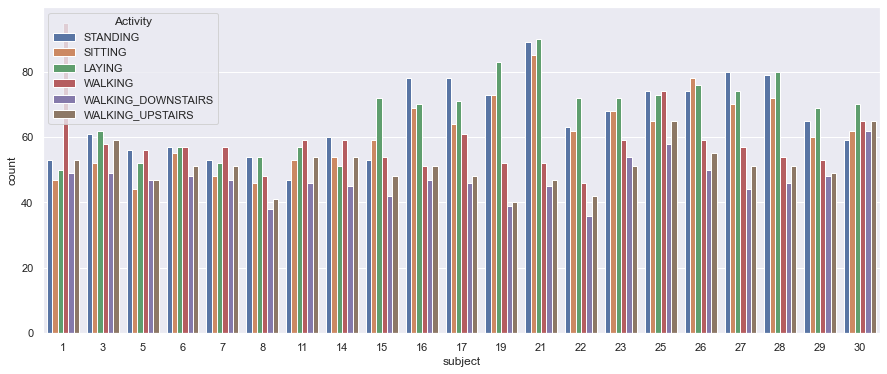

In [14]:
sns.set(rc={'figure.figsize':(15,6)})
a = sns.countplot(x=train["subject"],hue=train["Activity"], data=train)
plt.show()


# observation
Activities:

Static: STANDING, SITTING, LAYING
    
Dynamic: WALKING, WALKING DOWNSTAIRS, WALKING UPSTAIRS    



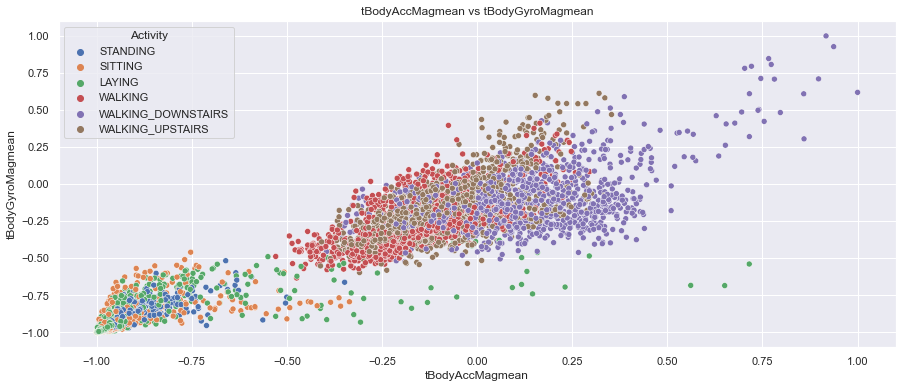

In [15]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = train["tBodyAccMagmean"],
                y = train["tBodyGyroMagmean"],
                hue = train["Activity"])
                
plt.title('tBodyAccMagmean vs tBodyGyroMagmean')
plt.show()

Text(0.5, 1.0, 'tBodyAccMagmean distribution w.r.t Activity')

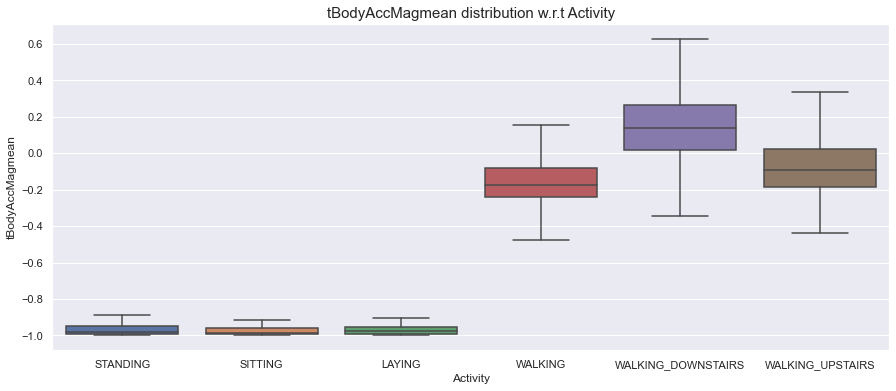

In [16]:
sns.boxplot(x = train["Activity"], y = train["tBodyAccMagmean"], data=train, showfliers=False)
plt.title('tBodyAccMagmean distribution w.r.t Activity', fontsize=15)

# Observations:

If tBodyAccMagmean is < -0.8 then the Activities are either Standing or Sitting or Laying.

If tBodyAccMagmean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

If tBodyAccMagmean is > 0.0 then the Activity is WalkingDownstairs.


Text(0.5, 1.0, 'Angle between Y-axis and Gravity_mean')

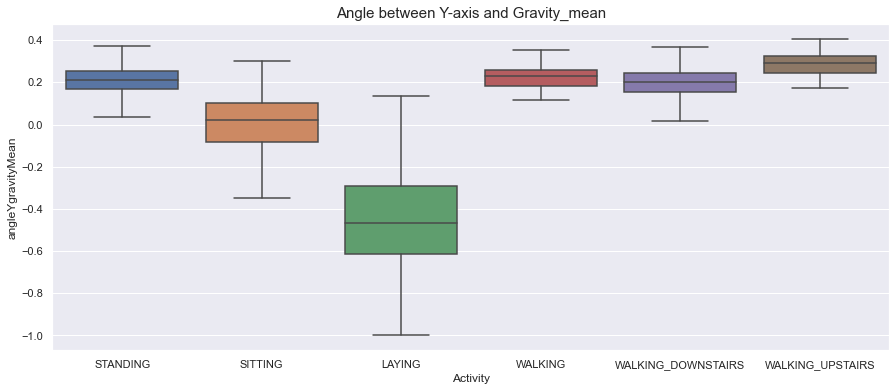

In [17]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)

# observation
If the Angle between Y-axis and Gravity_mean > 0 then the activities are either Standing or walking or walking downstairs or walking upstairs

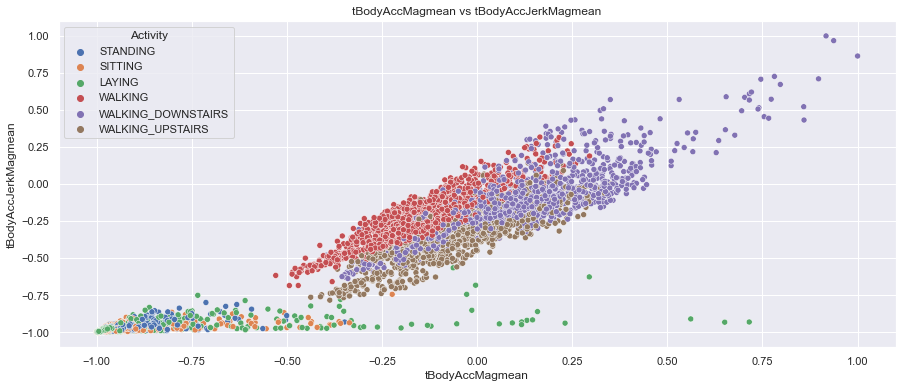

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = train["tBodyAccMagmean"],
                 y = train["tBodyAccJerkMagmean"],
                hue = train["Activity"])
                
plt.title('tBodyAccMagmean vs tBodyAccJerkMagmean')
plt.show()

Text(0.5, 1.0, 'Angle between X-axis and Gravity_mean')

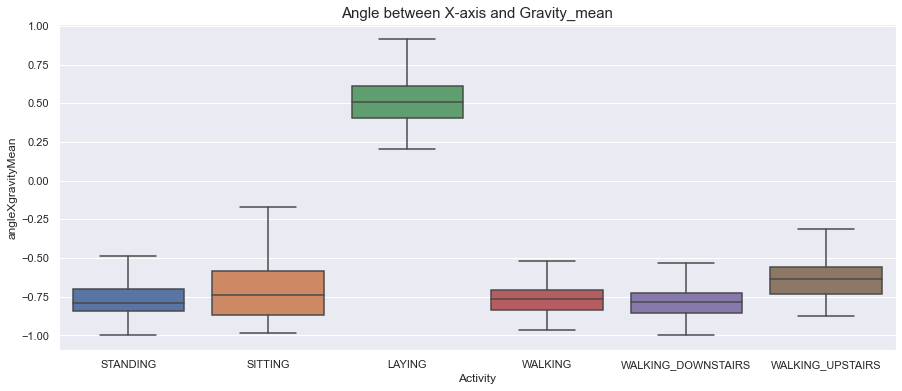

In [19]:
sns.boxplot(x = train["Activity"], y = train["angleXgravityMean"], data=train, showfliers=False)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)

# observation
If Angle between X-axis and Gravity_mean > 0 then Activity is Laying. 

<AxesSubplot:xlabel='Activity', ylabel='tBodyAccMagenergy'>

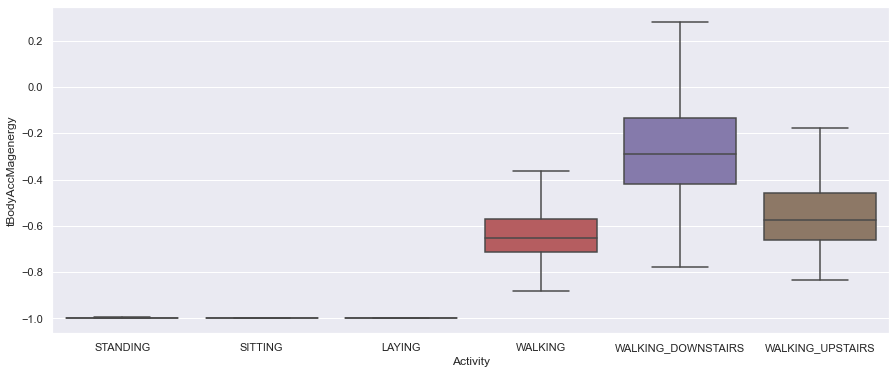

In [20]:
sns.boxplot(x = train["Activity"], y = train["tBodyAccMagenergy"], data=train, showfliers=False)

# observation
If tBodyAccMagenergy is  > -0.9 then the activities are Dynamic i.e, either walking or walking downstairs or walking upstairs

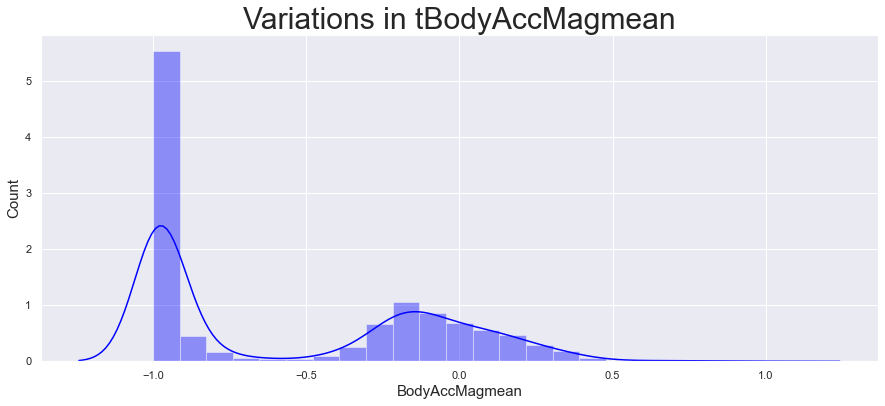

In [21]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.distplot(train['tBodyAccMagmean'], color = 'blue')
plt.title('Variations in tBodyAccMagmean', fontsize = 30)
plt.xlabel('BodyAccMagmean', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# observation
All feature value is in range -1 to +1


<Figure size 1080x432 with 0 Axes>

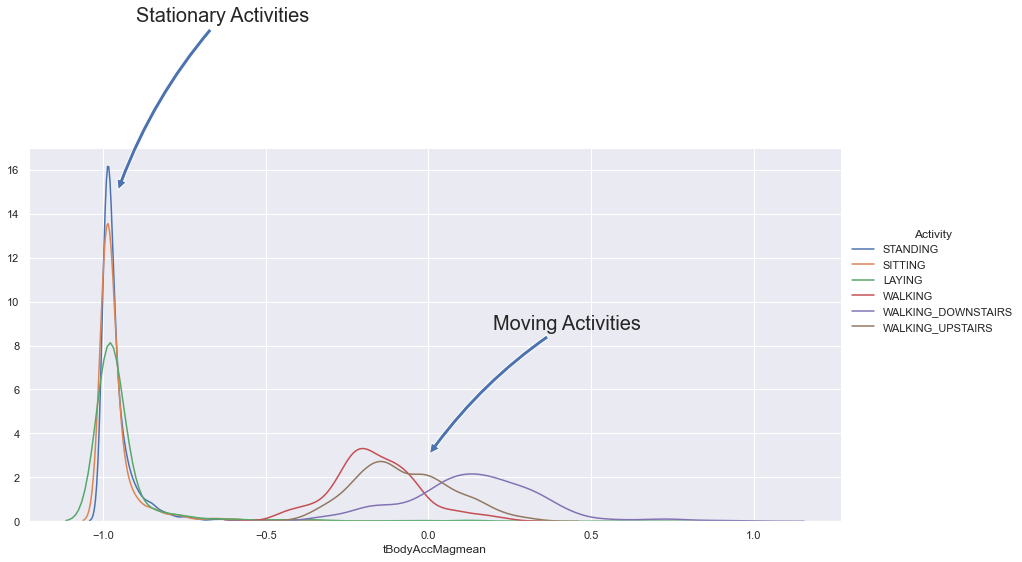

In [22]:
plt.figure(figsize=(15,6))
g = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
g.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,15), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Text(0.5, 1.0, 'tBodyAccMagenergy for Dynamic activities')

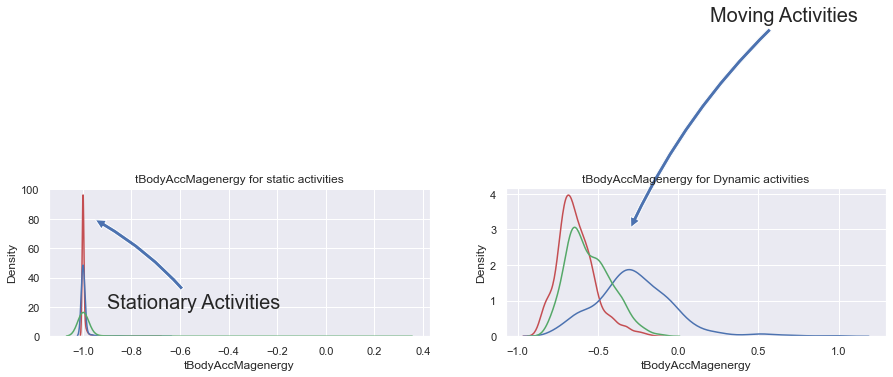

In [23]:
df1= train[train['Activity'] == "STANDING"]
df2= train[train['Activity'] == "SITTING"]
df3= train[train['Activity'] == "LAYING"]
df4= train[train['Activity'] == "WALKING"]
df5= train[train['Activity'] == "WALKING_DOWNSTAIRS"]
df6= train[train['Activity'] == "WALKING_UPSTAIRS"]
           
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.distplot(df1['tBodyAccMagenergy'], color= 'r', hist=False, label = "Standing")
sns.distplot(df2['tBodyAccMagenergy'], color= 'b', hist=False, label = "Sitting")
sns.distplot(df3['tBodyAccMagenergy'],color= 'g', hist=False, label = "Laying")

plt.annotate("Stationary Activities", xy=(-0.956,80), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title("tBodyAccMagenergy for static activities")
           
plt.subplot(2,2,2)
sns.distplot(df4['tBodyAccMagenergy'],color= 'r', hist=False, label = "WALKING")
sns.distplot(df5['tBodyAccMagenergy'],color= 'b', hist=False, label = "WALKING_DOWNSTAIRS")
sns.distplot(df6['tBodyAccMagenergy'], color= 'g', hist=False, label = "WALKING_UPSTAIRS")
plt.annotate("Moving Activities", xy=(-0.3,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title("tBodyAccMagenergy for Dynamic activities")

Text(0.5, 1.0, 'tBodyAccMagmean for Dynamic activities')

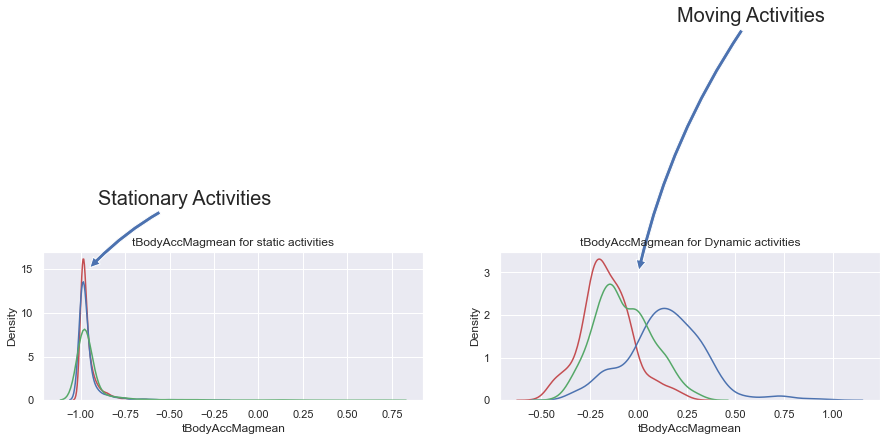

In [24]:
df1= train[train['Activity'] == "STANDING"]
df2= train[train['Activity'] == "SITTING"]
df3= train[train['Activity'] == "LAYING"]
df4= train[train['Activity'] == "WALKING"]
df5= train[train['Activity'] == "WALKING_DOWNSTAIRS"]
df6= train[train['Activity'] == "WALKING_UPSTAIRS"]

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.distplot(df1['tBodyAccMagmean'], color= 'r', hist=False, label = "Standing")
sns.distplot(df2['tBodyAccMagmean'], color= 'b', hist=False, label = "Sitting")
sns.distplot(df3['tBodyAccMagmean'],color= 'g', hist=False, label = "Laying")

plt.annotate("Stationary Activities", xy=(-0.956,15), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title("tBodyAccMagmean for static activities")

plt.subplot(2,2,2)
sns.distplot(df4['tBodyAccMagmean'],color= 'r', hist=False, label = "WALKING")
sns.distplot(df5['tBodyAccMagmean'],color= 'b', hist=False, label = "WALKING_DOWNSTAIRS")
sns.distplot(df6['tBodyAccMagmean'], color= 'g', hist=False, label = "WALKING_UPSTAIRS")

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title("tBodyAccMagmean for Dynamic activities")

In [25]:
pd.crosstab(train.subject, train.Activity, margins = True)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [26]:
#seperating X and y

In [27]:
x = train.loc[:,train.columns!= 'Activity']
y = train["Activity"]

In [28]:
x.shape

(7352, 562)

In [29]:
y.shape

(7352,)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
print(y)

[2 2 2 ... 5 5 5]


# Feature Scaling

Whenever we are dealing with Distance based algorithm, we should do the feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)


In [33]:
x

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

In [34]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [35]:
x_train.shape


(5881, 562)

In [36]:
x_test.shape

(1471, 562)

# KNN Classification

In [37]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
%%time
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

Wall time: 16.2 s


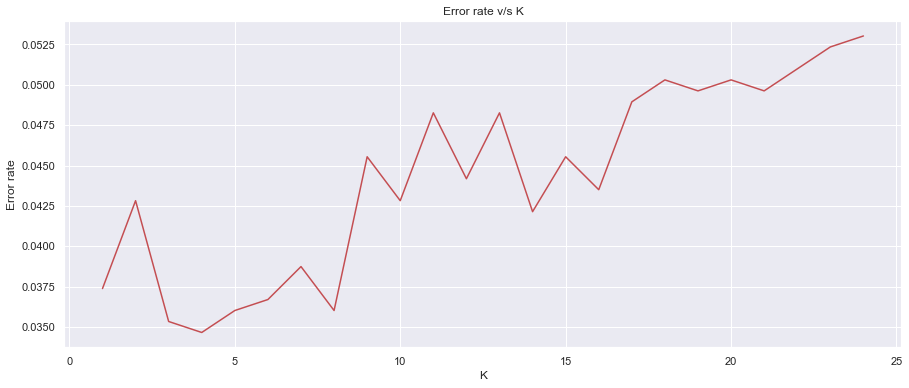

In [40]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

NOTE : from the above graph we can select k value as 3

# Model Building

In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


# Model Evaluation

In [42]:
confusion_matrix(y_test,y_pred)

array([[283,   2,   0,   0,   0,   0],
       [  1, 246,  28,   0,   0,   0],
       [  0,  13, 265,   0,   0,   0],
       [  0,   0,   0, 244,   0,   0],
       [  0,   0,   0,   4, 189,   3],
       [  0,   0,   0,   1,   0, 192]], dtype=int64)

In [43]:
knn_acc = accuracy_score(y_test,y_pred)
knn_acc


0.964649898028552

In [44]:
def performance(actual,prediction, string):
    cf=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(15,6))
    sns.heatmap(cf, fmt=".2g", annot=True, xticklabels = True, yticklabels= True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for "  +  string)

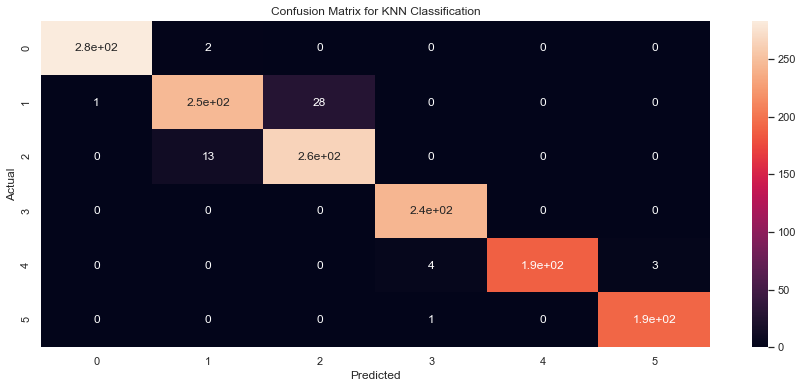

In [45]:
performance(y_test,y_pred, "KNN Classification")

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [48]:
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
#predictions
y_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 265,  10,   0,   0,   0],
       [  0,  16, 262,   0,   0,   0],
       [  0,   0,   0, 243,   0,   1],
       [  0,   0,   0,   1, 195,   0],
       [  0,   0,   0,   0,   0, 193]], dtype=int64)

In [52]:
LR_acc = accuracy_score(y_test,y_pred)
LR_acc

0.9809653297076818

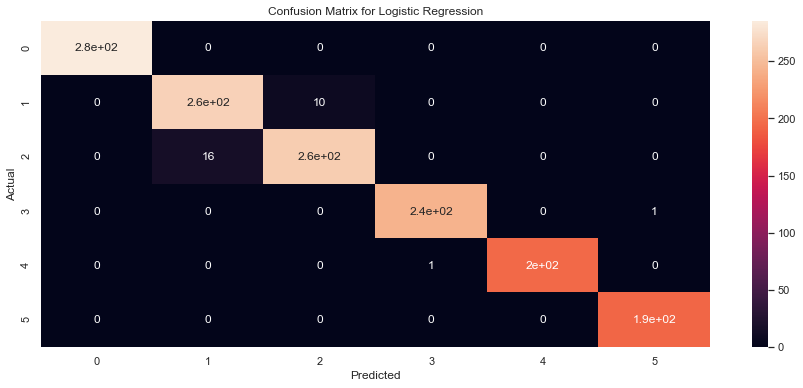

In [53]:
performance(y_test,y_pred, "Logistic Regression")

# SVM Classification

In [54]:
from sklearn import svm

In [55]:
clf_svm_l = svm.SVC(kernel='linear', C=100)
clf_svm_l.fit(x_train, y_train)

SVC(C=100, kernel='linear')

In [56]:
y_train_pred = clf_svm_l.predict(x_train)
y_test_pred = clf_svm_l.predict(x_test)

In [57]:
y_test_pred

array([0, 2, 4, ..., 0, 1, 1])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
confusion_matrix(y_test, y_test_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 266,   9,   0,   0,   0],
       [  0,  16, 262,   0,   0,   0],
       [  0,   0,   0, 244,   0,   0],
       [  0,   0,   0,   0, 196,   0],
       [  0,   0,   0,   0,   0, 193]], dtype=int64)

In [60]:
svm_linear_acc = accuracy_score(y_test, y_test_pred)
svm_linear_acc

0.9830047586675731

In [61]:
clf_svm_l.n_support_

array([ 96, 128, 126, 114, 101, 119])

# Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)}

In [64]:
clf_svm_l = svm.SVC(kernel='linear')

In [65]:
svm_grid_lin = GridSearchCV(clf_svm_l, params, n_jobs=-1,
                            cv=10, verbose=1, scoring='accuracy')

In [66]:
%%time
svm_grid_lin.fit(x_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
Wall time: 3min 40s


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [67]:
svm_grid_lin.best_params_

{'C': 0.05}

In [68]:
linsvm_clf = svm_grid_lin.best_estimator_

In [69]:
svm_grid_acc= accuracy_score(y_test, linsvm_clf.predict(x_test))
svm_grid_acc

0.9857239972807614

# Polynomial

In [70]:
clf_svm_p3 = svm.SVC(kernel='poly', degree=2, C=0.1)
clf_svm_p3.fit(x_train, y_train)

SVC(C=0.1, degree=2, kernel='poly')

In [71]:
%%time
y_train_pred = clf_svm_p3.predict(x_train)
y_test_pred = clf_svm_p3.predict(x_test)

Wall time: 21.1 s


In [72]:
svm_poly_acc= accuracy_score(y_test, y_test_pred)
svm_poly_acc

0.9177430319510537

In [73]:
clf_svm_p3.n_support_

array([596, 982, 906, 672, 366, 625])

# Radial

In [74]:
clf_svm_r = svm.SVC(kernel='rbf', gamma=0.5, C=10)
clf_svm_r.fit(x_train, y_train)

SVC(C=10, gamma=0.5)

In [75]:
%%time
y_train_pred = clf_svm_r.predict(x_train)
y_test_pred = clf_svm_r.predict(x_test)

Wall time: 43.6 s


In [76]:

svm_radial_acc = accuracy_score(y_test, y_test_pred)
svm_radial_acc

0.1937457511896669

In [77]:
clf_svm_r.n_support_

array([1122, 1011, 1096,  982,  790,  880])

# Radial Grid

In [78]:
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)}

In [79]:
clf_svm_r = svm.SVC(kernel='rbf')

In [80]:
svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,
                            cv=2, verbose=1, scoring='accuracy')

In [81]:
%%time
svm_grid_rad.fit(x_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
Wall time: 12min 55s


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [82]:
svm_grid_rad.best_params_

{'C': 50, 'gamma': 0.001}

In [83]:
radsvm_clf = svm_grid_rad.best_estimator_

In [84]:
svm_radial_grid_acc = accuracy_score(y_test, radsvm_clf.predict(x_test))
svm_radial_grid_acc

0.9898028552005439

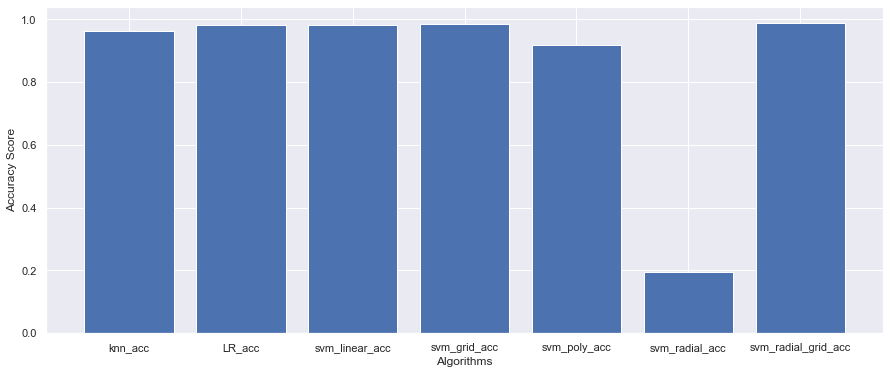

In [85]:

plt.bar(x=['knn_acc','LR_acc','svm_linear_acc','svm_grid_acc','svm_poly_acc','svm_radial_acc','svm_radial_grid_acc'],
        height=[knn_acc,LR_acc,svm_linear_acc,svm_grid_acc,svm_poly_acc,svm_radial_acc,svm_radial_grid_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()